<a href="https://colab.research.google.com/github/rkiee/project-emr2icd/blob/main/Doc2Vec_new_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Doc2Vec
# 엑셀을 통해 df형태로 로딩하여 정렬까지 한 후 txt에 저장
# DIAGCD 소수점 이하 자르고
# kcd_8 파일 참고하게 하여 출력하기

import warnings
# warnings.filterwarnings(action='ignore')

import pandas as pd
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from sklearn.metrics.pairwise import cosine_similarity

!pip install konlpy

# stopwords 및 library에 추가할 단어 목록이 저장된 git storage 복사
!git clone https://github.com/rkiee/project-emr2kcd-dataset.git

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 19.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 488.6/488.6 kB 5.3 MB/s eta 0:00:00
Cloning into 'project-emr2kcd-dataset'...
remote: Enumerating objects: 38, done.
remote: Counting objects: 100% (38/38), done.
remote: Compressing objects: 100% (38/38), done.
remote: Total 38 (delta 14), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (38/38), 3.63 MiB | 11.10 MiB/s, done.
Resolving deltas: 100% (14/14), done.


In [ ]:
# okt library에 단어 추가
# 패키지에 설치된 java 경로에 jar파일 압축 풀기
import os

os.chdir('/usr/local/lib/python3.10/dist-packages/konlpy/java')
# print(os.getcwd())
# extract file
!jar xvf open-korean-text-2.1.0.jar

# okt lib의 noun/names.txt의 단어 목록 로드
nouns_path = '/usr/local/lib/python3.10/dist-packages/konlpy/java/org/openkoreantext/processor/util/noun/'
nouns_df = []
nouns_df = pd.read_csv(os.path.join(nouns_path, "nouns.txt"), names = ["words"], header = None)
# print(nouns_df)

# 의약품 단어 목록 추가
words_path = '/content/project-emr2kcd-dataset/dictionary_medication.xlsx'
selected_columns = ['words']
w_df = []
w_df = pd.read_excel(words_path, usecols=selected_columns)
nouns_df = pd.concat([nouns_df, w_df], ignore_index=True)
# print(nouns_df)

# 일반 단어 목록 추가
words_path = '/content/project-emr2kcd-dataset/dictionary.xlsx'
selected_columns = ['words']
w_df = []
w_df = pd.read_excel(words_path, usecols=selected_columns)
nouns_df = pd.concat([nouns_df, w_df], ignore_index=True)
# print(nouns_df)

# 단어 목록 정렬
nouns_df = nouns_df.sort_values("words", ascending=True)
# print(nouns_df)

# txt 파일 형태로 저장
dictionary = ''
for i, text in enumerate(nouns_df['words']):
    dictionary += text + '\n'

with open("/usr/local/lib/python3.10/dist-packages/konlpy/java/org/openkoreantext/processor/util/noun/nouns.txt", 'w', encoding='utf-8') as f:
    f.write(dictionary)
# print(dictionary)

  created: META-INF/
 inflated: META-INF/MANIFEST.MF
  created: org/
  created: org/openkoreantext/
  created: org/openkoreantext/processor/
  created: org/openkoreantext/processor/normalizer/
  created: org/openkoreantext/processor/phrase_extractor/
  created: org/openkoreantext/processor/qa/
  created: org/openkoreantext/processor/stemmer/
  created: org/openkoreantext/processor/tokenizer/
  created: org/openkoreantext/processor/tools/
  created: org/openkoreantext/processor/util/
  created: org/openkoreantext/processor/util/adjective/
  created: org/openkoreantext/processor/util/adverb/
  created: org/openkoreantext/processor/util/auxiliary/
  created: org/openkoreantext/processor/util/freq/
  created: org/openkoreantext/processor/util/josa/
  created: org/openkoreantext/processor/util/noun/
  created: org/openkoreantext/processor/util/substantives/
  created: org/openkoreantext/processor/util/typos/
  created: org/openkoreantext/processor/util/verb/
 inflated: org/openkoreantext/pr

In [ ]:
# okt lib의 noun/names.txt의 단어 목록 로드
typos_path = '/usr/local/lib/python3.10/dist-packages/konlpy/java/org/openkoreantext/processor/util/typos/'
typos_df = []
typos_df = pd.read_csv(os.path.join(typos_path, "typos.txt"), header = None, names = ['before', 'after'], sep = " ")
# print(typos_df)

# 단어 목록 추가
typos_path = '/content/project-emr2kcd-dataset/dictionary_typos.xlsx'
selected_columns = ['before', 'after']
w_df = []
w_df = pd.read_excel(typos_path, usecols=selected_columns)
typos_df = pd.concat([typos_df, w_df], ignore_index=True)
# print(typos_df)

# 단어 목록 정렬
typos_df = typos_df.sort_values("before", ascending=True)
# print(typos_df)

# txt 파일 형태로 저장
dictionary = ''
for i, text in enumerate(typos_df['before']):
    dictionary += text +  ' ' + typos_df.iloc[i]['after']+'\n'

# print(dictionary)

with open("/usr/local/lib/python3.10/dist-packages/konlpy/java/org/openkoreantext/processor/util/typos/typos.txt", 'w', encoding='utf-8') as f:
    f.write(dictionary)

In [ ]:
# okt lib의 noun/names.txt의 단어 목록 로드
verbs_path = '/usr/local/lib/python3.10/dist-packages/konlpy/java/org/openkoreantext/processor/util/verb/'
verbs_df = []
verbs_df = pd.read_csv(os.path.join(verbs_path, "verb.txt"), names = ["words"], header = None)
# print(verbs_df)

# 단어 목록 추가
words_path = '/content/project-emr2kcd-dataset/dictionary_verb.xlsx'
selected_columns = ['words']
w_df = []
w_df = pd.read_excel(words_path, usecols=selected_columns)
verbs_df = pd.concat([verbs_df, w_df], ignore_index=True)
# print(verbs_df)

# 단어 목록 정렬
verbs_df = verbs_df.sort_values("words", ascending=True)
# print(verbs_df)

# txt 파일 형태로 저장
dictionary = ''
for i, text in enumerate(verbs_df['words']):
    dictionary += text + '\n'

with open("/usr/local/lib/python3.10/dist-packages/konlpy/java/org/openkoreantext/processor/util/verb/verb.txt", 'w', encoding='utf-8') as f:
    f.write(dictionary)
# print(dictionary)

In [ ]:
# 파일 묶기 : cvf
!jar cvf open-korean-text-2.1.0.jar org
# os.getcwd()
# os.chdir('/usr/local/lib/python3.10/dist-packages/konlpy/java')
# remove
!rm -r org

In [ ]:
# emr dataset 로드
file_path = '/content/신장내과_본원_외래_20230701_20231231_번역.xlsx'
selected_columns = ['ICD10', 'PI']
df = pd.read_excel(file_path, usecols=selected_columns)

In [ ]:
# kcd_path = '/content/project-emr2kcd-dataset/kcd_8.xlsx'
# selected_colums = ['KCD', 'TERMKOR', 'TERMENG']
# kcd_df = pd.read_excel(kcd_path, usecols=selected_colums)
# print(kcd_df)

In [ ]:
# 질병코드 소수점 아래 자르기
# for i, text in df['DIAGCD'].items() :
#     df['DIAGCD'][i] = text[0:4]
#     if (text[3:4]=='.') :
#         df['DIAGCD'][i] = text[0:3]
#         # print(df['DIAGCD'][i])

# for i, text in df['ICD10'].items() :
#     df.loc[i, 'ICD10'] = text[0:4]
#     if (text[3:4]=='.') :
#         df.loc[i, 'ICD10'] = text[0:3]
#         # print(df.loc[i, 'ICD10'])

In [ ]:
# stopwords 로드
stop_words = []
sw_path = '/content/project-emr2kcd-dataset/stopwords.xlsx'
sw_df = pd.read_excel(sw_path)
for i in range(len(sw_df)):
    stop_words = sw_df['stop words'].tolist()

In [ ]:
from sklearn.model_selection import train_test_split

# 학습용, 테스트용, 검증용 데이터 분할
X_train, X_test_val = train_test_split(df, test_size=0.3, random_state=42)
X_test, X_val = train_test_split(X_test_val, test_size=0.3, random_state=42)
# random_state : 데이터를 어떤 순서로 섞을지. 0으로 하면 원래 데이터 순서대로 가는 것

# X_train : 학습 데이터 206
# X_test : 평가 데이터 89
# X_val : 검증(validatioin) 데이터 27

# print(f"X_train: {len(X_train)}")
# print(f"X_test_val: {len(X_test_val)} (X_test : {len(X_test)} + X_val : {len(X_val)})")

# print(X_train)
# print(X_test_val)

from konlpy.tag import Okt
okt = Okt()

# Doc2Vec 모델 학습을 위해 데이터 포맷 변환 (TaggedDocument 객체 생성)
# parts = ['Alpha', 'Noun', 'Adjective']
parts = ['Alpha', 'Noun']
# parts = ['Alpha']
tagged_data = []

for i, text in enumerate(df['PI']):
    morphs = okt.pos(text)  # 형태소 분석 결과를 가져옴
    filtered_word = []
    for morph, part in morphs:
        if part in parts and morph not in stop_words:
            filtered_word.append(morph)  # 선택한 품사에 해당하면서 불용어가 아닌 단어를 추가
    # tagged_data.append(TaggedDocument(words=filtered_word, tags=[df.loc[i, 'DIAGCD']]))
    tagged_data.append(TaggedDocument(words=filtered_word, tags=[df.loc[i, 'ICD10']]))

# 현병력 형태소 분석 결과 출력
# print(tagged_data)

# for tagged_doc in tagged_data:
#     print(tagged_doc.tags)

# # ['R318']
# # ['R829']
# # ['N182']

# print(tagged_data)

# Doc2Vec 모델 생성 및 학습
model = Doc2Vec(vector_size=20, window = 1, min_count=1, epochs=50)
# vector_size : 각 문서의 벡터 차원의 크기 (default : 100)
# window : 문맥 윈도우 크기. (default : 5)
# epoches : 전체 데이터셋에 대해 학습을 반복하는 횟수를 지정 (default : 10)

# 모델에 문서 집합을 토큰화하여 단어장을 생성
model.build_vocab(tagged_data)
# print(model.dv)

# 학습
model.train(tagged_data, total_examples=model.corpus_count, epochs=model.epochs)
# total_examples : 전체 훈련 예제의 수를 지정. 이 값은 모델에게 전체 데이터셋 크기를 알려준다
# epochs : 훈련 반복 횟수를 지정. 위에서 지정한 모델에서 이미 설정되어 있어 별로도 지정하지 않음
# 모델 저장
# model.save("/content/d2v.model")

# # 모델의 키 값을 조회합니다.
# keys = model.dv.key_to_index
# # 조회된 키 값을 출력합니다.
# for key in keys:
#     print(key)

# # R318
# # R829
# # N182

In [ ]:
import numpy as np

# 각 제목 별 문서 벡터의 평균을 계산
title_vectors = {}
# 전체 목록을 돌면서
# DIAGCD 값 기준으로 나눔
for index, row in df.iterrows():
    vector = model.infer_vector(row['PI'].split())
    # if row['DIAGCD'] not in title_vectors:
    #     title_vectors[row['DIAGCD']] = [vector]
    # else:
    #     title_vectors[row['DIAGCD']].append(vector)
    if row['ICD10'] not in title_vectors:
        title_vectors[row['ICD10']] = [vector]
    else:
        title_vectors[row['ICD10']].append(vector)
# print(title_vectors)

averaged_documents = []
for title, vectors in title_vectors.items():
    averaged_vector = np.mean(vectors, axis=0)
    averaged_documents.append((title, averaged_vector))
# print(averaged_documents)

# print(len(averaged_documents))

# 평균화된 벡터를 사용하여 모델 재학습
for title, vector in averaged_documents:
    # print(title)
    model.dv[title] = vector

In [ ]:
# 입력된 내용과 유사한 문서 검색
input_text = input("현병력 입력하세요: ")

morphs = okt.pos(input_text)
input_tokens = []
for morph, pos in morphs:
    if pos in parts and morph not in stop_words:
        input_tokens.append(morph)

print(input_tokens)
input_vector = model.infer_vector(input_tokens)

similar_documents = model.dv.most_similar([input_vector], topn=5)

print(similar_documents)

for title, score in similar_documents:
    print(f"{title} similarity: {score:.3f}")

# for i in range(len(similar_documents)) :
#     print(similar_documents[i])






# X_train : 학습 데이터 206
# X_test : 평가 데이터 89
# X_val : 검증(validatioin) 데이터 27

# 검증용 데이터를 사용하여 정확도 측정
y_true = [] # 실제값
y_pred = [] # 예측값

for i, row in X_val.iterrows():
    text = row['PI']
    morphs = okt.pos(text)
    input_tokens = []
    for morph, part in morphs:
        if part in parts and morph not in stop_words:
            input_tokens.append(morph)
    # print(input_tokens)

    input_vector = model.infer_vector(input_tokens) # 모델에 입력되는 벡터를 추론

    # X_train의 각 문서에 대해 입력벡터와의 유사도를 계산
    similarities = []
    for j, row_train  in X_train.iterrows():
        # j번째 문서에 대한 docment vector
        # document_vector = model.dv[row_train['DIAGCD']]
        document_vector = model.dv[row_train['ICD10']]
        # input_vector와 document_vector 사이의 유사도 계산
        similarity = cosine_similarity([input_vector], [document_vector])[0][0]
        # # 계산된 유사도를 리스트에 추가
        similarities.append(similarity)

    # 가장 높은 유사도를 가진 doc의 인덱스를 가져온다
    predicted_index = np.argmax(similarities)
    # print(predicted_index)
    # 실제값을 y_true 리스트에 추가하고, 예측값을  y_pred 리스트에 추가
    # y_true.append(row['DIAGCD'])
    # y_pred.append(X_train.iloc[predicted_index]['DIAGCD'])
    y_true.append(row['ICD10'])
    y_pred.append(X_train.iloc[predicted_index]['ICD10'])

print(f"예측값 : {y_pred}")
print(f"실제값 : {y_true}\n")

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='weighted', zero_division='warn')
f1 = f1_score(y_true, y_pred, average='weighted', zero_division='warn')
recall = recall_score(y_true, y_pred, average='weighted', zero_division='warn')

print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"F1 Score: {f1:.3f}")
print(f"Recall: {recall:.3f}")

# 측정 결과 범위
# Noun, Alpha 5
# Accuracy: 0.693 ~ 0.750
# Precision: 0.887 ~ 0.911
# F1 Score: 0.768 ~ 0.805
# Recall: 0.693 ~ 0.750

# Noun, Alpha, Adjective 5
# Accuracy: 0.739 ~ 0.773
# Precision: 0.886 ~ 0.913
# F1 Score: 0.807 ~ 0.827
# Recall: 0.739 ~ 0.773

# 번역 data
# Accuracy: 0.716
# Precision: 0.893
# F1 Score: 0.781
# Recall: 0.716

현병력 입력하세요: The patient is a patient of 64 years old (F) currently being treated with the diagnostic name [Herpes Zoster].Herpes is used to use antiviral drugs due to frequent recurrence, and has risen to CR 1.0 in the 2022-12-28 test.Please be busy.thank youI will ask you.Derma Prof.R1 ======================================================== I didn't have a good condition in December last year.144/74-74
['The', 'patient', 'is', 'a', 'patient', 'years', 'old', 'currently', 'being', 'treated', 'the', 'diagnostic', 'name', 'Herpes', 'Zoster', 'Herpes', 'is', 'used', 'to', 'use', 'antiviral', 'drugs', 'due', 'to', 'frequent', 'recurrence', 'has', 'risen', 'to', 'CR', 'in', 'the', 'test', 'Please', 'be', 'busy', 'thank', 'youI', 'will', 'ask', 'you', 'Derma', 'Prof', 'I', 'didn', 'have', 'a', 'good', 'condition', 'in', 'December', 'last', 'year']
[('N178', 0.9804616570472717), ('C3499', 0.9138541221618652), ('Q625', 0.9061485528945923), ('N401', 0.8977099061012268), ('N020', 0.8896416425704

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<ipython-input-14-aa434ebc45dc>:12: DeprecationWarning: Call to deprecated `docvecs` (The `docvecs` property has been renamed `dv`.).
  for tag, index in zip(model.docvecs.index_to_key, range(len(model.docvecs))):
<ipython-input-14-aa434ebc45dc>:13: DeprecationWarning: Call to deprecated `docvecs` (The `docvecs` property has been renamed `dv`.).
  vectors.append(model.docvecs[index])


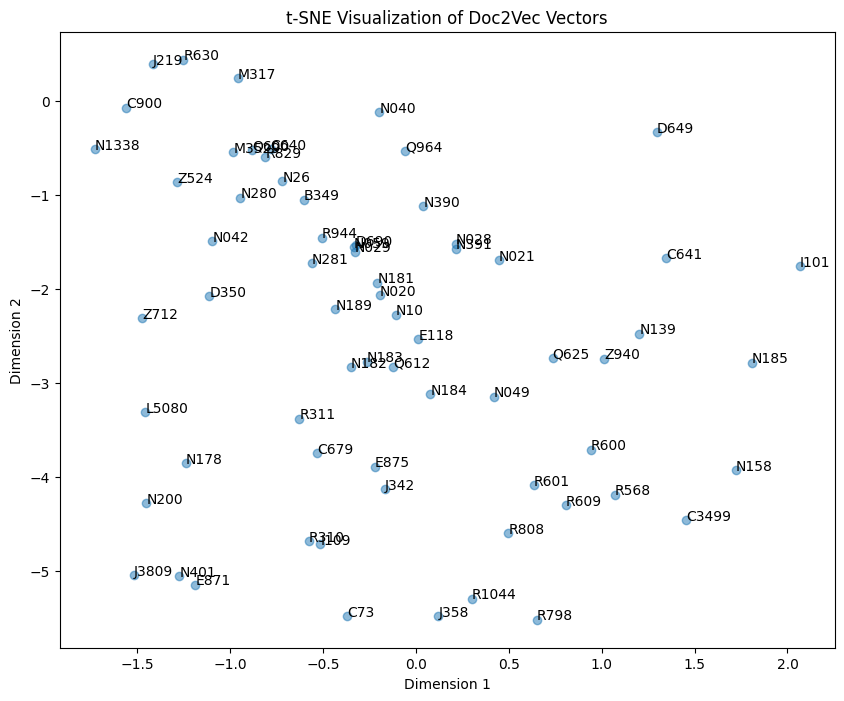

In [ ]:
from sklearn.manifold import TSNE
import numpy as np
import matplotlib.pyplot as plt
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

# Your Doc2Vec model
# model = Doc2Vec.load("your_model_path")

# Extract vectors and corresponding document tags
vectors = []
tags = []
for tag, index in zip(model.docvecs.index_to_key, range(len(model.docvecs))):
    vectors.append(model.docvecs[index])
    tags.append(tag)

# Convert vectors to numpy array
vectors_array = np.array(vectors)

# Dimensionality reduction using t-SNE
tsne = TSNE(n_components=2, random_state=42)
vectors_tsne = tsne.fit_transform(vectors_array)

# Plotting
plt.figure(figsize=(10, 8))
plt.scatter(vectors_tsne[:, 0], vectors_tsne[:, 1], alpha=0.5)

# Annotate points with document tags
for i, tag in enumerate(tags):
    plt.annotate(tag, (vectors_tsne[i, 0], vectors_tsne[i, 1]))

plt.title('t-SNE Visualization of Doc2Vec Vectors')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()

In [ ]:
import matplotlib.font_manager as fm

# 시스템에 설치된 한글 폰트 목록 출력
font_list = fm.findSystemFonts(fontpaths=None, fontext='ttf')
for font in font_list:
    if 'Nanum' in font:  # 나눔 폰트가 있는지 확인
        print(font)

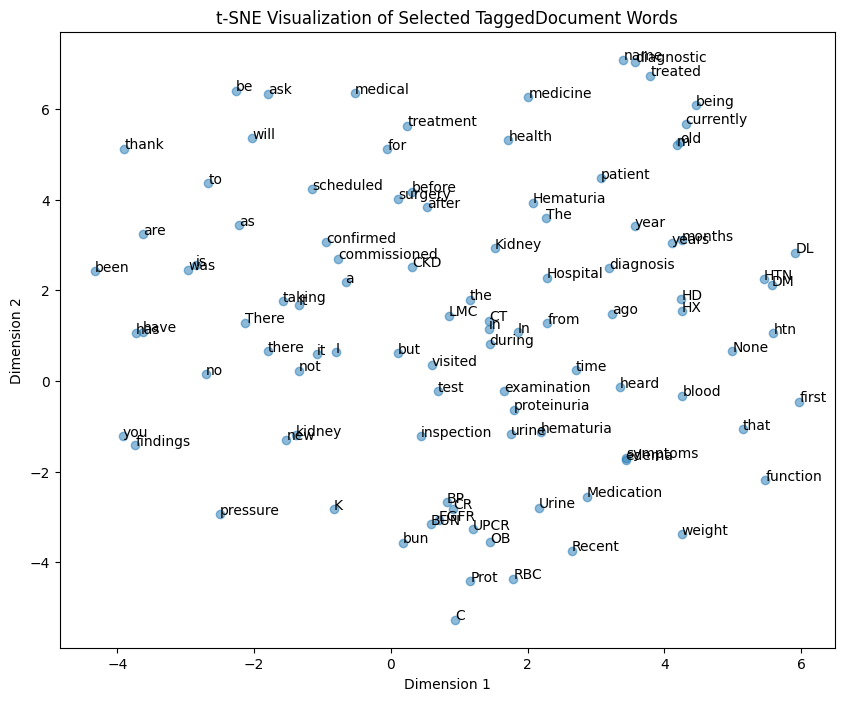

In [ ]:
from sklearn.manifold import TSNE
import numpy as np
import matplotlib.pyplot as plt
from gensim.models.doc2vec import TaggedDocument


plt.rc('font', family='NanumGothic')

# Your TaggedDocument list
# tagged_data = [...]  # Your list of TaggedDocument objects

# Extract words from TaggedDocuments
words = []
for tagged_document in tagged_data:
    words.extend(tagged_document.words)

# Remove duplicate words
unique_words = list(set(words))

from collections import Counter

# Count word frequencies
word_counter = Counter(words)

# Select top N most frequent words
num_words_to_display = 100  # Adjust this value as needed
selected_words = [word for word, _ in word_counter.most_common(num_words_to_display)]

# Extract vectors for selected words
vectors = []
for word in selected_words:
    try:
        vector = model.wv[word]  # Assuming model is your Doc2Vec model
        vectors.append(vector)
    except KeyError:
        # If the word is not in the vocabulary of the model, skip it
        pass

# Convert vectors to numpy array
vectors_array = np.array(vectors)

# Dimensionality reduction using t-SNE
tsne = TSNE(n_components=2, random_state=42)
vectors_tsne = tsne.fit_transform(vectors_array)

# Plotting
plt.figure(figsize=(10, 8))
plt.scatter(vectors_tsne[:, 0], vectors_tsne[:, 1], alpha=0.5)

# Annotate points with words
for i, word in enumerate(selected_words):
    plt.annotate(word, (vectors_tsne[i, 0], vectors_tsne[i, 1]))

plt.title('t-SNE Visualization of Selected TaggedDocument Words')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()

In [ ]:
from konlpy.tag import Okt
okt = Okt()

file_path = '/content/신장내과_본원_외래_20230701_20231231_번역.xlsx'
selected_columns = ['ICD10', 'PI']
df = pd.read_excel(file_path, usecols=selected_columns)

# Doc2Vec 모델 학습을 위해 데이터 포맷 변환 (TaggedDocument 객체 생성)
parts = ['Alpha', 'Noun']
texts = []

def tokenizer(text):
    morphs = okt.pos(text)  # 형태소 분석 결과를 가져옴
    # stopwords 제외
    words = [morph for morph, part in morphs if (part in parts and morph not in stop_words) and len(morph) > 2]
    return words

texts = [tokenizer(text) for i, text in enumerate(df['PI'])]
print(texts)

from gensim.corpora.dictionary import Dictionary

dictionary = Dictionary(texts)
dictionary.filter_extremes(keep_n=2000, no_below=5, no_above=0.5)
corpus = [dictionary.doc2bow(text) for text in texts]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[['단백뇨', '거품뇨', 'Protein', 'Creat'], ['edema', '요독증', 'DOE', 'Known', 'HTN', '강심내과', '알닥톤', 'hyperkalemia', 'temporary', 'pacemaker', '알닥톤', '강심내과', '당뇨약'], ['edema', '요독증', 'DOE', 'Known', 'HTN', 'hypothyroidism', 'LMC', 'eGFR'], ['edema', '요독증', 'DOE', 'Known', 'HTN', 'LMC', 'CKD'], ['edema', 'mild', 'CKD', 'ADPKD', 'eGFR', 'RRT'], ['elevation', 'management', '신경과', '컨디션'], ['AKI', 'AKI', 'CKD', 'LMC', 'pre', 'lab', 'serum', 'serum', 'eGFR', 'IDMS', 'eGFR', 'Perioperative', 'evaluation', 'care', 'management', '정형외과', 'LMC', 'HTN'], ['Paroxysmal', 'atrial', 'fibrillation', '메스꺼움', '순환기내과'], ['방광염', 'urinary', 'gross', 'hematuria'], ['HTN', 'BPH', 'Spinal', 'stenosis', 'HNP', 'CKD', 'kidney', 'USG', 'eGFR'], ['kidney', 'cyst'], ['type', '내분비', 'eGFR', 'APN', 'ceftriaxone', 'cepha'], ['AKI', 'HTN', 'heavy', 'alcoholics', '신기능', 'eGFR', 'UPCR', 'eGFR'], ['type', 'chronic', 'hepatitis', '바라크', '보훈병원', '로부터', 'HCV'], ['Aneurysm', 'comm', 'MRA', 'PCoA', 'aneurysm', 'CTA', '조영제', 'evaluation

In [ ]:
from gensim.models import LdaModel

num_topics = 10
passes = 5

%time model = LdaModel(corpus=corpus, id2word=dictionary, passes=passes, num_topics=num_topics, random_state=7)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


CPU times: user 2.24 s, sys: 30.8 ms, total: 2.28 s
Wall time: 2.28 s


In [ ]:
model.print_topics(num_words=10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0,
  '0.103*"LMC" + 0.099*"HTN" + 0.067*"edema" + 0.059*"eGFR" + 0.045*"Known" + 0.039*"DOE" + 0.037*"요독증" + 0.035*"CKD" + 0.026*"pain" + 0.024*"현미경"'),
 (1,
  '0.044*"management" + 0.038*"elevation" + 0.035*"lab" + 0.030*"kidney" + 0.028*"CKD" + 0.028*"evaluation" + 0.026*"HTN" + 0.024*"LMC" + 0.023*"BUN" + 0.020*"infarction"'),
 (2,
  '0.070*"renal" + 0.043*"stone" + 0.041*"RBC" + 0.041*"HPF" + 0.036*"both" + 0.030*"USG" + 0.027*"hematuria" + 0.026*"eGFR" + 0.022*"Kidney" + 0.021*"LMC"'),
 (3,
  '0.098*"urinary" + 0.085*"hematuria" + 0.080*"eGFR" + 0.068*"gross" + 0.063*"HTN" + 0.043*"신기능" + 0.026*"단백뇨" + 0.020*"현미경" + 0.015*"방광염" + 0.014*"건강검진"'),
 (4,
  '0.087*"eGFR" + 0.054*"LMC" + 0.042*"HTN" + 0.040*"lab" + 0.038*"serum" + 0.029*"거품뇨" + 0.027*"kidney" + 0.026*"BSA" + 0.024*"신기능" + 0.021*"condition"'),
 (5,
  '0.072*"none" + 0.044*"medication" + 0.033*"Transfusion" + 0.028*"serum" + 0.028*"condition" + 0.028*"HTN" + 0.028*"General" + 0.027*"ECOG" + 0.027*"urine" + 0.027*"Infect

In [ ]:
print("#topic distribution of the first document: ", model.get_document_topics(corpus)[0])

#topic distribution of the first document:  [(0, 0.020000568), (1, 0.020000573), (2, 0.02000378), (3, 0.02000204), (4, 0.40774357), (5, 0.020003486), (6, 0.020009762), (7, 0.43223137), (8, 0.02000048), (9, 0.02000435)]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#!pip install pyldavis

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()

# feed the LDA model into the pyLDAvis instance
lda_viz = gensimvis.prepare(model, corpus, dictionary)
lda_viz

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
5     -0.315086  0.039240       1        1  18.164190
8      0.073306 -0.121054       2        1  12.632940
1     -0.063806 -0.041543       3        1  11.662042
4     -0.153517 -0.033003       4        1  11.542465
0      0.092914 -0.107921       5        1   9.766519
3      0.066568 -0.077462       6        1   7.976587
7      0.098300  0.214208       7        1   7.298467
9      0.083435 -0.134914       8        1   7.274076
2      0.094333  0.179752       9        1   7.027894
6      0.023551  0.082697      10        1   6.654820, topic_info=        Term        Freq       Total Category  logprob  loglift
11      eGFR  524.000000  524.000000  Default  30.0000  30.0000
3        단백뇨  120.000000  120.000000  Default  29.0000  29.0000
141      RBC   92.000000   92.000000  Default  28.0000  28.0000
5        HTN  296.000000  296.000000  Default  27.0000  27.0000
161     none   98.000000   98.000000  Default  26.0000  26.0000
..       ...         ...         ...      ...      ...      ...
32   urinary    6.676631   86.650173  Topic10  -4.2065   0.1466
36       USG    4.513084   40.889716  Topic10  -4.5981   0.5059
42      UPCR    4.958624   57.454160  Topic10  -4.5040   0.2600
205     ESRD    3.237497   32.224748  Topic10  -4.9303   0.4119
18       컨디션    2.604431   20.008280  Topic10  -5.1479   0.6709

[464 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
203       4  0.256512    ACR
203       8  0.641280    ACR
13        4  0.180941  ADPKD
13        6  0.542823  ADPKD
13        9  0.180941  ADPKD
...     ...       ...    ...
105       9  0.144992    현미경
78        1  0.168393  호흡기내과
78        2  0.168393  호흡기내과
78        4  0.168393  호흡기내과
78        7  0.336787  호흡기내과

[1077 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[6, 9, 2, 5, 1, 4, 8, 10, 3, 7])

In [ ]:
# input_text = input("형태소 분석: ")

# parts_skip = ['Punctuation']

# morphs = okt.pos(input_text)
# input_tokens = []
# for morph, pos in morphs:
#     # if pos in parts and morph not in stop_words:
#     if pos not in parts_skip:
#         print(morph + "(" + pos + ")")